### Linear Regression - Car Price Prediction

In this Notebook, we will solve a simple problem for demonstrating Linear Regression Machine Learning Model. 

##### Challenge Description
This is the link for the [Car Price Prediction challenge](https://www.kaggle.com/hellbuoy/car-price-prediction) on Kaggle that we are building a model for. In short, this is about Predicting the Key Parameters that influnece a Car Price in US market. There will be some known data provided about various models of cars, the technical and economical parameters along with their prices. The model is expected to learn from it and predict the expected price for new cars to assist the business with pricing exercise.

**Linear Regression** is a linear approach for modeling the relationship between a Scalar response and one or more explainatory variables. These are also called **dependant(output)** and **independant(input)** variables. (Source - [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)

The ojective of this note book is to demonstrate the following concept practically:
1. **Explorator Data Analysis (EDA)**
2. **Data Clean-up**
3. **Feature Engineering**
4. **Model Generation**
5. **Measure Model Accuracy**

We will use **Linear Regression Model** with a Cost Function called **RMSE** (Root mean Squared Error) and **R-Squared** to fit a model that is optimal. I will also leave some pointers for other means of best fitting a Linear Regression Model.

#### Data Gathering - First hand Analysis

In [346]:
# Data Processing
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#For Data Pre-Processing
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, OneHotEncoder
#For Feature Selection, Train-Test-Split
from sklearn.model_selection import train_test_split
# For Fitting the ML Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# For Model Measurement
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [347]:
# The Data CSV can be downloaded at the Kaggle link given above
# Data imported, no null values reported here
data_original = pd.read_csv("CarPrice_Assignment.csv")
data_original.info()  
#data_original.doornumber.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [212]:
# Determines if there are duplicate rows, and marks respective (one of the rows) as True.
# Looks like no duplicate rows, hence nothing to clean-up
# To convert data type
pd.set_option('max_rows',0)
pd.set_option('max_columns',0)
data_original.duplicated().sum()

0

In [213]:
# NULL Values - Let's analyze Missing Numbers and Percentages by Column wise
data_null_pct = data_original.isna().mean().round(4)*100
data_null_pct

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

### 2. Exploratory Data Analysis

In [298]:
# Numerical Data Understanding
data_original.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [300]:
# Catagorical/Object Data Understanding
data_original.describe(include='O')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [301]:
# UNIQUE VALUES - This tells us Unique values across an Axis, in this case, Columnar, so counting axis is 0 here. 
# Compare this with Merge axis for columns, which is 1, just a side note.
data_original.nunique(axis=0)
# data_original.describe()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

#### Inferences from Above
* We can see that there are no variables with a single unique value (Zero Variance)
    * If any they are not good for model selection, in this cases, we have none
* Car name - We can refine a bit as the count of names for 200+ population looks huge
* Other numerical and categorical values look okay, we need understand their importance


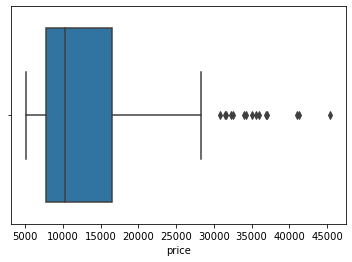

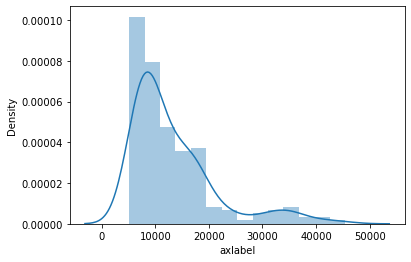

Mean: 13276.710570731706, Median: 10295.0


In [302]:
# Do a bit closer Analysis of Output variable - Price
sns.boxplot(x='price',data=data_original)
plt.show()
sns.distplot(x=data_original['price'], axlabel="axlabel")
plt.show()
print(f"Mean: {data_original.price.mean()}, Median: {data_original.price.median()}")

#### Pairplots for All Numeric Variables

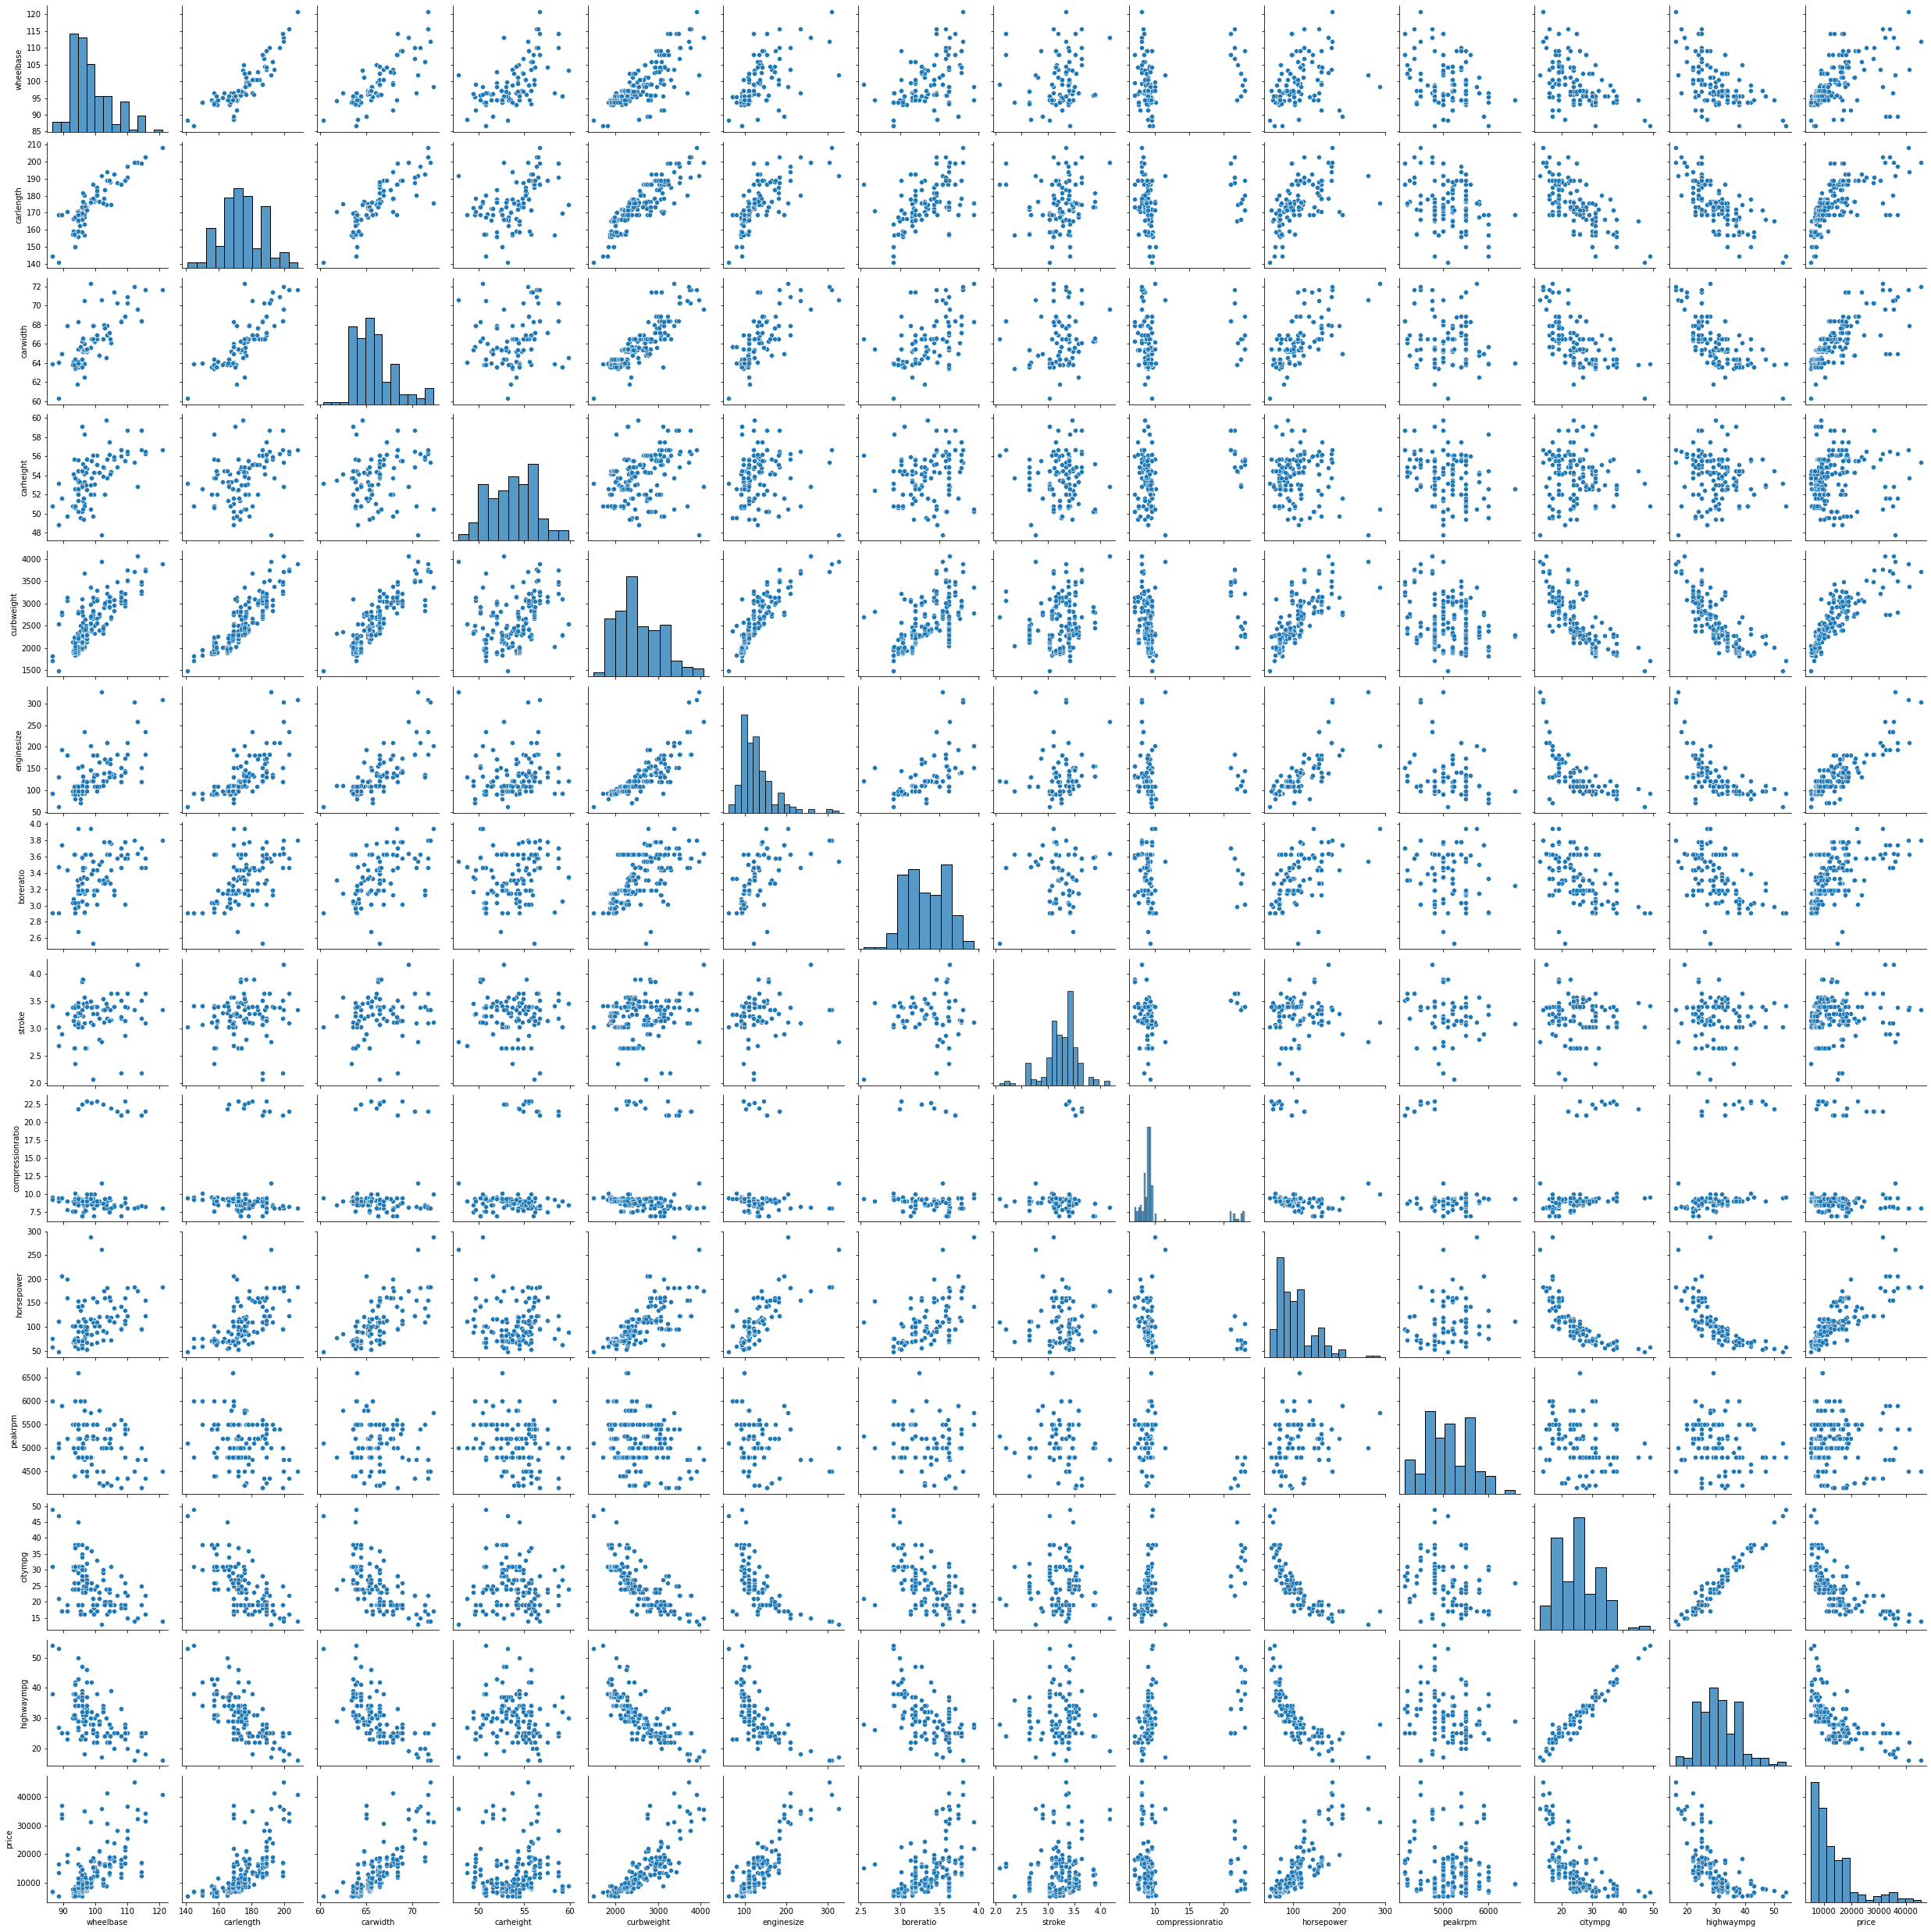

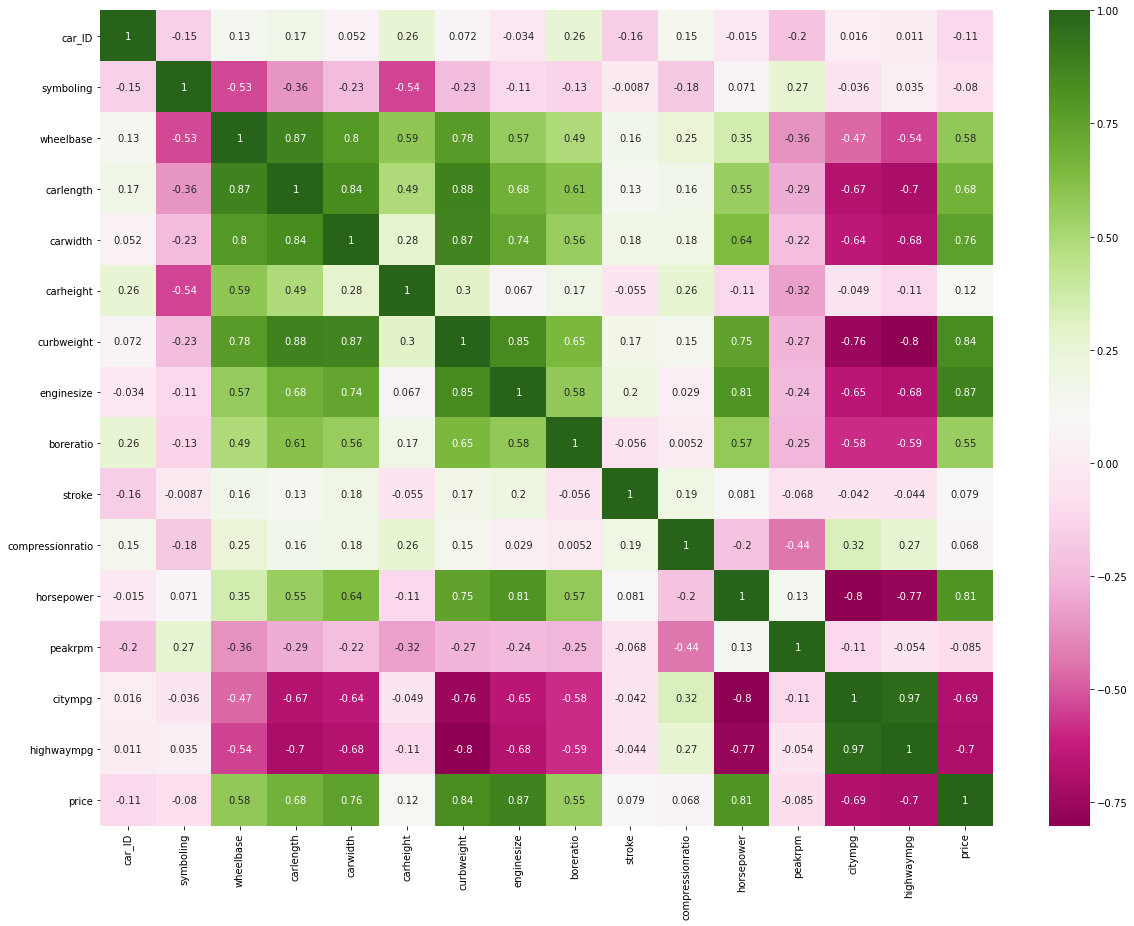

In [303]:
# Bi Variate Pairwise analysis of all Features
sns.pairplot(data_original[num_col_names])
plt.show()
plt.figure(figsize=(20,15))
sns.heatmap(data_original.corr(), cmap='PiYG', annot=True)
plt.show()

#### Inferences from Above Analysis
Car_ID has no relation to price, can be dropped
car length, car width, curb weight, enginesize, horsepower are positively linearly corelated with price
citympg, highwaympg have negative linear corelation with price
However citympg, highwaympg have positive corelation with each other. We need to remove one of them
Also, there are other parameters that have high Multi colienarity. We will look at them

#### Visualize Categorical Variables

In [305]:
data_original.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


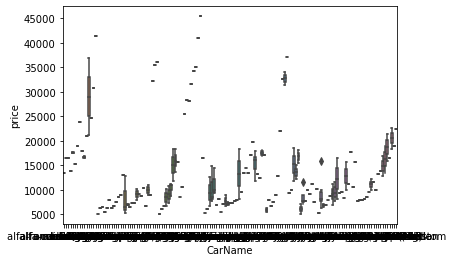

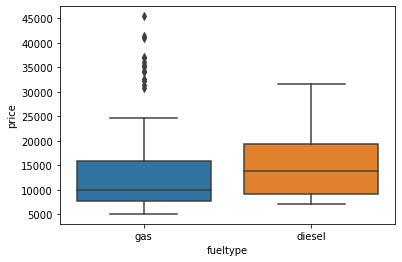

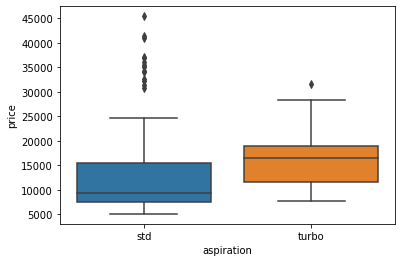

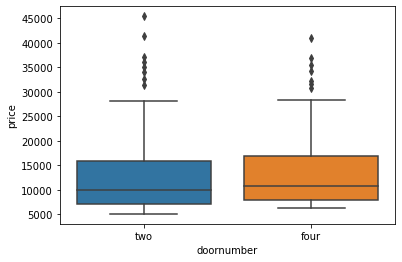

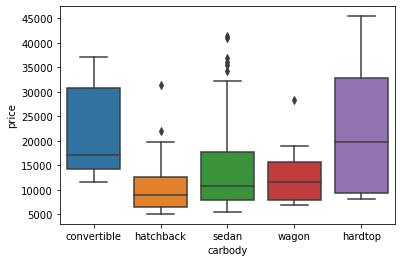

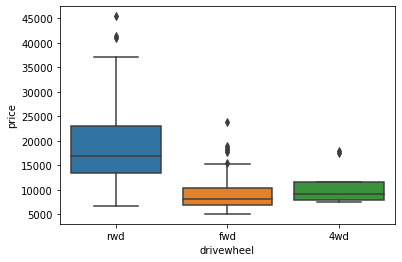

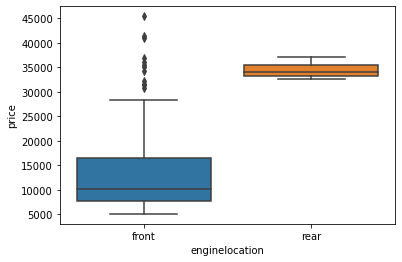

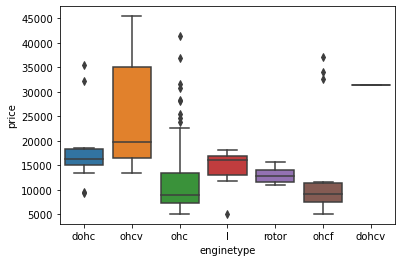

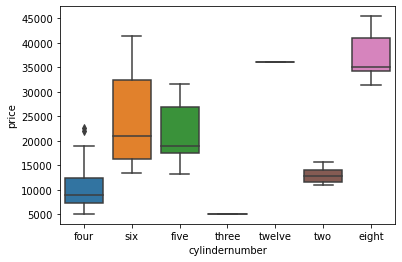

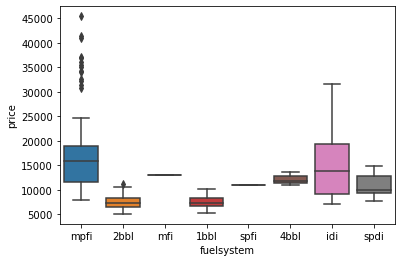

In [307]:
cat_col_names=data_original.select_dtypes('object').columns.values
for col in cat_col_names:
    sns.boxplot(x=col, y='price',data=data_original)
    plt.show()

#### Inferences from Above Analysis
Except Car Name and Door number, every other categorical variable has a significance in influencing the output variables. We can visualize that based on the quartiles of the box plots

### 3. Feature Engineering
1. Introduce Car_PriceRange as a Category
2. Transform Car Name to Make
3. Make Data Types consistent for Car Price Range, Door number
4. Remove Unwanted Columns - Car ID, Car Name, CityMPG

In [308]:
pd.set_option('max_columns',50)
pd.set_option('max_rows',500)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,...,fuelsystem_spfi,Cars_Category_High,Cars_Category_Mid,Make_Nissan,Make_Porsche,Make_Toyota,Make_Volkswagen,Make_alfa-romero,Make_audi,Make_bmw,Make_buick,Make_chevrolet,Make_dodge,Make_honda,Make_isuzu,Make_jaguar,Make_mercury,Make_mitsubishi,Make_peugeot,Make_plymouth,Make_porcshce,Make_renault,Make_saab,Make_subaru,Make_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,27,13495.0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,27,16500.0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,26,16500.0,0,0,1,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,30,13950.0,0,0,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,22,17450.0,0,0,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [348]:
# As the Price is right skewed and majority data is centeed below 20000, its good to have that fact as a column
# So, we do a tricky logic here to first add mean for each cat name based on price -> GroupBy, Aggregation, followed by join, and binning 
# Use Cut method to bin Cars based on price range
df2 = data_original.copy()
df2['Make'] = [carname.split(' ')[0] for carname in df2['CarName']]

In [349]:
df_price_buckets = df2.groupby(['Make'])['price'].mean()
df2 = df2.merge(df_price_buckets, how='left', on='Make')
df2.head
# Now, using cut method, let's bin the Cars - Convert Continuous Price to categorical ranges
bins = [0,10000,20000,40000]
labels = ["Entry","Mid","High"]
df2['Cars_Category']=pd.cut(df2['price_y'],bins=bins, labels=labels)
df2['price'] = df2['price_x']
df2.head(100)
df2.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price_x', 'Make', 'price_y', 'Cars_Category', 'price'],
      dtype='object')

In [350]:
df2.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_x,Make,price_y,Cars_Category,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,15498.333333,Mid,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,15498.333333,Mid,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,15498.333333,Mid,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,17859.166714,Mid,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,17859.166714,Mid,17450.0


In [351]:
# Car Name - Simplify to Make - we could keep only the Make names, not model.
# Anyway, other parameters have model specific nuances, so we should be good that way
#df2 = data_original.copy()
df2.shape
df2 = df2.drop(['car_ID','CarName','price_x','price_y'], axis=1)
df2.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Make,Cars_Category,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero,Mid,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero,Mid,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,alfa-romero,Mid,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,audi,Mid,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,audi,Mid,17450.0


In [352]:
# Make Name consistency - with case, spellings & abbreviations
df2['Make']=df2['Make'].replace({'vokswagen':'Volkswagen','vw':'Volkswagen','volkswagen':'Volkswagen'})
df2['Make']=df2['Make'].replace({'toyouta':'Toyota','toyota':'Toyota'})
df2['Make']=df2['Make'].replace({'nissan':'Nissan'})
df2['Make']=df2['Make'].replace({'maxda':'Mazda','mazda':'Mazda'})
df2['Make']=df2['Make'].replace({'porsche':'Porsche'})
print(df2['Make'].value_counts())
print("Total number of Makes-->>",len(df2['Make'].unique()))
df2.columns

Toyota         32
Nissan         18
Mazda          17
honda          13
mitsubishi     13
subaru         12
Volkswagen     12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
isuzu           4
Porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
porcshce        1
Name: Make, dtype: int64
Total number of Makes-->> 23


Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'Make', 'Cars_Category', 'price'],
      dtype='object')

In [353]:
#Let's handle some Categorical columns' data types appropriately
df2['Cars_Category'] = df2['Cars_Category'].astype('str')
df2['symboling'] = df2['symboling'].astype('str')

In [354]:
df2.drop(['citympg'],axis=1,inplace=True)

In [355]:
df2.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,Make,Cars_Category,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,27,alfa-romero,Mid,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,27,alfa-romero,Mid,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,26,alfa-romero,Mid,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,30,audi,Mid,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,22,audi,Mid,17450.0


In [356]:
# Do one hot encoding for Categorical values
cat_col_names=df2.select_dtypes('object').columns.values
df2 = pd.get_dummies(df2, columns=cat_col_names, drop_first=True)
df2.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,...,fuelsystem_spfi,Make_Nissan,Make_Porsche,Make_Toyota,Make_Volkswagen,Make_alfa-romero,Make_audi,Make_bmw,Make_buick,Make_chevrolet,Make_dodge,Make_honda,Make_isuzu,Make_jaguar,Make_mercury,Make_mitsubishi,Make_peugeot,Make_plymouth,Make_porcshce,Make_renault,Make_saab,Make_subaru,Make_volvo,Cars_Category_High,Cars_Category_Mid
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,27,13495.0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,27,16500.0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,26,16500.0,0,0,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,30,13950.0,0,0,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,22,17450.0,0,0,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [357]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 71 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              205 non-null    float64
 1   carlength              205 non-null    float64
 2   carwidth               205 non-null    float64
 3   carheight              205 non-null    float64
 4   curbweight             205 non-null    int64  
 5   enginesize             205 non-null    int64  
 6   boreratio              205 non-null    float64
 7   stroke                 205 non-null    float64
 8   compressionratio       205 non-null    float64
 9   horsepower             205 non-null    int64  
 10  peakrpm                205 non-null    int64  
 11  highwaympg             205 non-null    int64  
 12  price                  205 non-null    float64
 13  symboling_-2           205 non-null    uint8  
 14  symboling_0            205 non-null    uint8  
 15  symbol

### 4. Model Generation

In [ ]:
# Model Selection
# Let's now start with Linear Regression Model for this problem
# And then, we will use OLS. 

In [358]:
df2.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,...,fuelsystem_spfi,Make_Nissan,Make_Porsche,Make_Toyota,Make_Volkswagen,Make_alfa-romero,Make_audi,Make_bmw,Make_buick,Make_chevrolet,Make_dodge,Make_honda,Make_isuzu,Make_jaguar,Make_mercury,Make_mitsubishi,Make_peugeot,Make_plymouth,Make_porcshce,Make_renault,Make_saab,Make_subaru,Make_volvo,Cars_Category_High,Cars_Category_Mid
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,27,13495.0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,27,16500.0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,26,16500.0,0,0,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,30,13950.0,0,0,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,22,17450.0,0,0,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [360]:
X = df2.drop(['price'], axis=1)
y = df2['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=25)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 5. Model Accuracy

In [361]:
y_pred = model.predict(X_test)
print("Mean Squared Error-->", np.round(np.sqrt(mean_squared_error(y_test,y_pred)),4))
print("R Squared Value-->", np.round(r2_score(y_test,y_pred),4))
print(model.score)

Mean Squared Error--> 2411.9128
R Squared Value--> 0.9164
<bound method RegressorMixin.score of LinearRegression()>


### 6. OLS Model

In [362]:
import statsmodels.api as sm
X_train_ols = sm.add_constant(X_train)
lm_ols = sm.OLS(y_train,X_train_ols)
lm = lm_ols.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     40.72
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           7.09e-43
Time:                        15:26:53   Log-Likelihood:                -1241.4
No. Observations:                 143   AIC:                             2603.
Df Residuals:                      83   BIC:                             2781.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.241e+

In [363]:
print(X_test.shape)
print(X_train.shape)
y_pred_ols = lm.predict(sm.add_constant(X_test))
print("Mean Squared Error-->", np.round(np.sqrt(mean_squared_error(y_test,y_pred_ols)),4))
print("R Squared Value-->", np.round(r2_score(y_test,y_pred_ols),4))
#print(model.score)

(62, 70)
(143, 70)
Mean Squared Error--> 2578.4179
R Squared Value--> 0.9045


### Optimization - Scale the X data, Looks for any Feature Removals

In [282]:
df3 = df2.copy()
# Let's remove Wheelbase, Curbweight; and few columns with high p-value above
#df3.drop(['curbweight'],axis=1,inplace=True)

In [284]:
X3 = df3.drop(['price'], axis=1) # Recollect that citympg is highly corelated to highmpg, hence deleting it
y3 = df3['price']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3)
model3 = LinearRegression()
model3.fit(X_train3, y_train3)

y_pred3 = model3.predict(X_test3)
print("Mean Squared Error-->", np.round(np.sqrt(mean_squared_error(y_test3,y_pred3)),4))
print("R Squared Value-->", np.round(r2_score(y_test3,y_pred3),4))
print(model3.score)

Mean Squared Error--> 2993.9219
R Squared Value--> 0.8583
<bound method RegressorMixin.score of LinearRegression()>


In [293]:
# Now, let's try the same after MinMax Scaling the data if that improves it
df4 = df2.copy()
num_columns = ['wheelbase','carlength' ,'carwidth', 'carheight', 'curbweight', 'enginesize','boreratio', 'stroke', 'compressionratio', 'horsepower' ,'peakrpm']
mmscaler = MinMaxScaler()
df4[num_columns] = mmscaler.fit_transform(df4[num_columns])
df4.head()

X4 = df4.drop(['price'], axis=1) # Recollect that citympg is highly corelated to highmpg, hence deleting it
y4 = df4['price']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3)
model4 = LinearRegression()
model4.fit(X_train4, y_train4)

y_pred4 = model4.predict(X_test4)
print("Mean Squared Error-->", np.round(np.sqrt(mean_squared_error(y_test4,y_pred4)),4))
print("R Squared Value-->", np.round(r2_score(y_test4,y_pred4),4))
print(model4.score)

Mean Squared Error--> 2772.2557
R Squared Value--> 0.8395
<bound method RegressorMixin.score of LinearRegression()>


In [294]:
# Let's try Standard Scaler
df5 = df2.copy()
num_columns = ['wheelbase','carlength' ,'carwidth', 'carheight', 'curbweight', 'enginesize','boreratio', 'stroke', 'compressionratio', 'horsepower' ,'peakrpm']
sscaler = StandardScaler()
df5[num_columns] = sscaler.fit_transform(df5[num_columns])
df5.head()

X5 = df5.drop(['price'], axis=1) # Recollect that citympg is highly corelated to highmpg, hence deleting it
y5 = df5['price']
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3)
model5 = LinearRegression()
model5.fit(X_train5, y_train5)

y_pred5 = model5.predict(X_test5)
print("Mean Squared Error-->", np.round(np.sqrt(mean_squared_error(y_test5,y_pred5)),4))
print("R Squared Value-->", np.round(r2_score(y_test5,y_pred5),4))
print(model5.score)

Mean Squared Error--> 2776.6
R Squared Value--> 0.8452
<bound method RegressorMixin.score of LinearRegression()>


In [ ]:
# Now, let's try the same after Scaling the data if that improves it
df_price_scaled = data_original.copy()
std = StandardScaler()
price_reshaped = np.reshape(df_price_scaled['price'].values, (-1,1))
df_price_scaled['price_standard']=std.fit_transform(price_reshaped)
print("Data Distribution After Standard Scaling")
sns.distplot(df_price_scaled['price_standard'], axlabel="Standard Scaled")
plt.show()
minsc = MinMaxScaler()
df_price_scaled['price_minmax']=minsc.fit_transform(price_reshaped)
print("Data Distribution After Standard Scaling")
sns.distplot(df_price_scaled['price_minmax'], axlabel="MinMax Scaled")
plt.show()
powertr = PowerTransformer(method='yeo-johnson', standardize=True)
df_price_scaled['price_power_trans'] = powertr.fit_transform(price_reshaped)
print("Data Distribution After Power Transforming")
sns.distplot(df_price_scaled['price_power_trans'], axlabel="MinMax Scaled")
plt.show()